In [0]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [0]:
# Importing MNIST Fashion dataset through Tensorflow

import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#normalize
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Converting train images
trainImages = np.zeros((train_images.shape[0],train_images.shape[1]*train_images.shape[1]))
for i, train_image in enumerate(train_images):
  trainImages[i] = train_image.flatten()

trainLabels = train_labels   # onehotEncode(train_labels) is ok

# Creating test set and validation set (10% of train set)
validationImages = trainImages[0:6000, :]
validationLabels = trainLabels[0:6000]  
trainImages = trainImages[6001:60000, :]
trainLabels = trainLabels[6001:60000]

# Converting test images
testImages = np.zeros((test_images.shape[0],test_images.shape[1]*test_images.shape[1]))
for i, test_image in enumerate(test_images):
  testImages[i] = test_image.flatten()
testLabels = test_labels 

### Utility Functions

In [0]:
def show_target_variable_histogram(y_data, title):
  abscisse = range(np.min(y_data), np.max(y_data)+1)
  abscisse_categ_list = [(y_data == a).sum() for a in abscisse]
  b = plt.bar(abscisse, abscisse_categ_list, color="steelblue")
  plt.title(title, fontsize=14)
  plt.show()

  unique_label, counts_elements = np.unique(y_data, return_counts=True)
  # Dictionnaire de "label : count_of_occurrence"
  print("Repartition des : (label, count_of_occurence) ", dict(zip(unique_label, counts_elements)))
  
def getAccuracyOfMikowskiDegrees(knn, testInputs, testTargets, rangeToLoop):
  #reset other param
  knn.set_params(n_neighbors = 5)
  
  cm = 0
  accuracyScores = []
  for degree in rangeToLoop:
    knn.set_params(p = degree)
    yPredictedTest = knn.predict(testInputs)
    accuracyScores.append(sklearn.metrics.accuracy_score(testTargets, yPredictedTest))
    cm = confusion_matrix(yPredictedTest, testTargets) + cm
    
  print(accuracyScores)
  return cm / len(rangeToLoop)
  
def getAccuracyOfNNeighbors(knn, testInputs, testTargets, rangeToLoop):
  #reset other param
  knn.set_params(p = 2)
  
  cm = 0
  accuracyScores = []
  for n in rangeToLoop:
    knn.set_params(n_neighbors = n)
    yPredictedTest = knn.predict(testInputs)
    accuracyScores.append(sklearn.metrics.accuracy_score(testTargets, yPredictedTest))
    cm = confusion_matrix(yPredictedTest, testTargets) + cm

  print(accuracyScores)
  return cm / len(rangeToLoop)
  
def plot_confusion_matrix(cm, normalize=False):
    classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    cmap=plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Label distribution

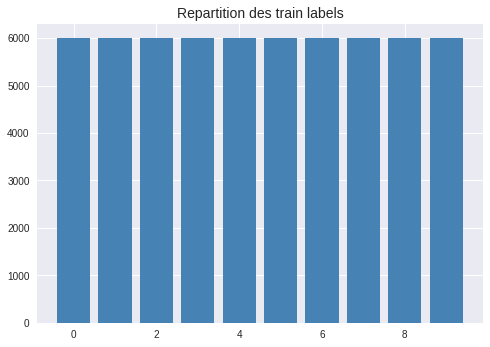

Repartition des : (label, count_of_occurence)  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


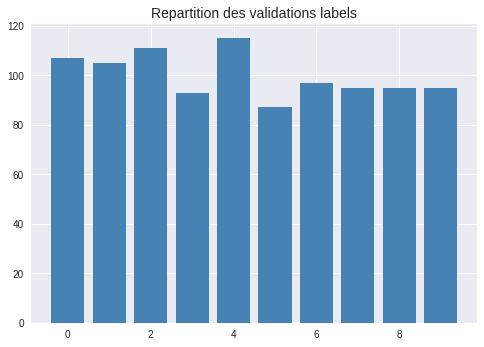

Repartition des : (label, count_of_occurence)  {0: 107, 1: 105, 2: 111, 3: 93, 4: 115, 5: 87, 6: 97, 7: 95, 8: 95, 9: 95}


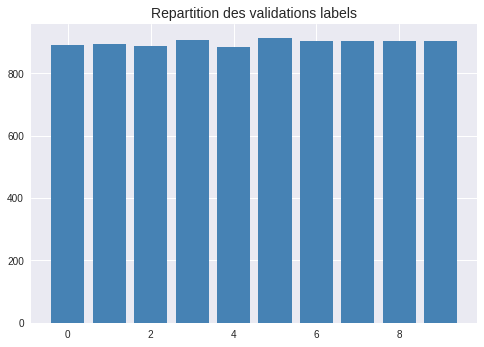

Repartition des : (label, count_of_occurence)  {0: 892, 1: 895, 2: 889, 3: 907, 4: 885, 5: 913, 6: 903, 7: 905, 8: 905, 9: 905}


In [0]:
show_target_variable_histogram(trainLabels, "Repartition des train labels")
show_target_variable_histogram(validationLabels, "Repartition des validations labels")
show_target_variable_histogram(testLabels, "Repartition des validations labels")

## Hyperparameter search on Original Images dataset

In [0]:
knn = KNeighborsClassifier()
knn.fit(trainImages, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
print(knn.get_params())

knn.set_params(n_neighbors = 5)

print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [0]:
# Mikowsky degree p from 1 to 5
getAccuracyOfMikowskiDegrees(knn, validationImages, validationLabels, range(1, 6))

[0.8606666666666667, 0.8606666666666667, 0.8606666666666667, 0.8606666666666667, 0.8606666666666667]


array([[496.,   4.,   9.,  21.,   5.,   0., 122.,   0.,   2.,   0.],
       [  2., 622.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,   0.],
       [  5.,   4., 493.,   8.,  74.,   0.,  88.,   0.,   6.,   0.],
       [ 11.,  10.,   4., 538.,  16.,   0.,   9.,   0.,   6.,   0.],
       [  2.,   0.,  60.,  19., 448.,   0.,  41.,   0.,   3.,   0.],
       [  0.,   0.,   0.,   0.,   0., 505.,   0.,   1.,   1.,   0.],
       [ 41.,   3.,  39.,  22.,  41.,   2., 323.,   0.,   5.,   0.],
       [  0.,   0.,   1.,   0.,   0.,  60.,   0., 589.,   4.,  14.],
       [  3.,   0.,   1.,   1.,   0.,   3.,   5.,   0., 562.,   0.],
       [  0.,   0.,   1.,   0.,   0.,  24.,   1.,  27.,   1., 588.]])

In [0]:
# Scores of using 1 to 5 neighbors
getAccuracyOfNNeighbors(knn, validationImages, validationLabels, range(1, 6))

[0.8561666666666666, 0.8525, 0.8585, 0.8615, 0.8606666666666667]


array([[4.940e+02, 4.000e+00, 1.320e+01, 2.760e+01, 6.200e+00, 4.000e-01,
        1.306e+02, 0.000e+00, 3.400e+00, 0.000e+00],
       [2.200e+00, 6.248e+02, 4.000e-01, 4.200e+00, 6.000e-01, 0.000e+00,
        6.000e-01, 0.000e+00, 2.000e-01, 0.000e+00],
       [6.400e+00, 2.800e+00, 4.944e+02, 7.600e+00, 8.200e+01, 0.000e+00,
        9.320e+01, 0.000e+00, 7.600e+00, 0.000e+00],
       [1.160e+01, 7.400e+00, 5.200e+00, 5.376e+02, 2.060e+01, 0.000e+00,
        9.800e+00, 0.000e+00, 4.000e+00, 0.000e+00],
       [1.600e+00, 8.000e-01, 5.580e+01, 1.660e+01, 4.328e+02, 0.000e+00,
        4.300e+01, 0.000e+00, 2.600e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.230e+02,
        0.000e+00, 2.800e+00, 1.000e+00, 3.000e+00],
       [4.100e+01, 3.200e+00, 3.620e+01, 1.700e+01, 4.160e+01, 1.600e+00,
        3.078e+02, 0.000e+00, 6.800e+00, 4.000e-01],
       [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e-01, 4.560e+01,
        0.000e+00, 5.932e+02, 4.000e+

In [0]:
# Scores of using 6 to 10 neighbors
getAccuracyOfNNeighbors(knn, validationImages, validationLabels, range(6, 11))

[0.8603333333333333, 0.8565, 0.8605, 0.8571666666666666, 0.8603333333333333]


array([[4.952e+02, 3.200e+00, 1.100e+01, 2.040e+01, 5.000e+00, 0.000e+00,
        1.300e+02, 0.000e+00, 1.200e+00, 0.000e+00],
       [2.400e+00, 6.204e+02, 0.000e+00, 2.000e+00, 2.000e-01, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [6.600e+00, 4.000e+00, 4.822e+02, 7.000e+00, 7.000e+01, 0.000e+00,
        8.040e+01, 0.000e+00, 9.200e+00, 0.000e+00],
       [1.300e+01, 1.160e+01, 4.000e+00, 5.396e+02, 1.460e+01, 0.000e+00,
        9.200e+00, 0.000e+00, 5.800e+00, 0.000e+00],
       [1.800e+00, 0.000e+00, 5.880e+01, 1.700e+01, 4.522e+02, 0.000e+00,
        4.020e+01, 0.000e+00, 4.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.100e+02,
        0.000e+00, 1.000e+00, 1.000e+00, 8.000e-01],
       [3.740e+01, 3.800e+00, 4.820e+01, 2.500e+01, 4.200e+01, 2.000e+00,
        3.228e+02, 0.000e+00, 7.200e+00, 1.000e+00],
       [0.000e+00, 0.000e+00, 1.600e+00, 0.000e+00, 0.000e+00, 5.440e+01,
        0.000e+00, 5.932e+02, 4.000e+

In [0]:
# Scores of using specific nbr of neighbors
getAccuracyOfNNeighbors(knn, validationImages, validationLabels, [100, 200, 300, 400, 500])

[0.8235, 0.8088333333333333, 0.7993333333333333, 0.7915, 0.7871666666666667]


array([[4.820e+02, 4.800e+00, 7.400e+00, 3.420e+01, 4.000e+00, 1.600e+00,
        1.572e+02, 0.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 6.042e+02, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 8.000e-01, 0.000e+00],
       [9.400e+00, 1.020e+01, 4.098e+02, 4.800e+00, 6.440e+01, 0.000e+00,
        8.580e+01, 0.000e+00, 1.220e+01, 0.000e+00],
       [2.860e+01, 1.220e+01, 2.000e+00, 5.244e+02, 1.020e+01, 0.000e+00,
        1.200e+01, 0.000e+00, 1.060e+01, 0.000e+00],
       [6.800e+00, 4.000e+00, 9.220e+01, 2.160e+01, 4.276e+02, 0.000e+00,
        5.880e+01, 0.000e+00, 7.800e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.294e+02,
        0.000e+00, 2.000e+00, 1.000e+00, 1.600e+00],
       [2.640e+01, 7.600e+00, 9.360e+01, 2.240e+01, 7.780e+01, 6.800e+00,
        2.640e+02, 0.000e+00, 1.340e+01, 4.000e+00],
       [6.000e-01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.018e+02,
        6.000e-01, 5.698e+02, 1.460e+

## Hyperparameter search on the Downsampled images dataset

Import

In [0]:
!pip install -U scikit-image

import skimage
from skimage.transform import rescale

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.14.1)


Downsample the images

In [0]:
# downsampling and flattening train images
trainImagesDown = np.zeros((train_images.shape[0], 196))
for i, train_image in enumerate(train_images):
  trainImagesDown[i] = rescale(train_image, 0.5).flatten()

# Creating test set and validation set (10% of train set)
validationImagesDown = trainImagesDown[0:6000, :]
trainImagesDown = trainImagesDown[6001:60000, :]

# downsampling and flattening test images
testImagesDown = np.zeros((test_images.shape[0], 196))
for i, test_image in enumerate(test_images):
  testImagesDown[i] = rescale(test_image, 0.5).flatten()

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Train

In [0]:
knnDown = KNeighborsClassifier()
knnDown.fit(trainImagesDown, trainLabels)
print(trainImagesDown.shape)
print(testImagesDown.shape)

(53999, 196)
(10000, 196)


Test

In [0]:
# Mikowsky degree p from 1 to 5
getAccuracyOfMikowskiDegrees(knnDown, validationImagesDown, validationLabels, range(1, 6))

[0.8646666666666667, 0.8646666666666667, 0.8646666666666667, 0.8646666666666667, 0.8646666666666667]


array([[482.,   3.,   7.,  19.,   4.,   0., 116.,   0.,   2.,   0.],
       [  2., 622.,   0.,   7.,   1.,   0.,   2.,   0.,   0.,   0.],
       [  8.,   4., 490.,   6.,  71.,   0.,  84.,   0.,   6.,   0.],
       [ 13.,  10.,   2., 548.,  15.,   0.,  10.,   0.,   4.,   0.],
       [  3.,   2.,  66.,  15., 449.,   0.,  46.,   0.,   4.,   0.],
       [  0.,   0.,   0.,   0.,   0., 533.,   0.,   3.,   1.,   2.],
       [ 49.,   2.,  41.,  15.,  43.,   1., 326.,   0.,   5.,   1.],
       [  0.,   0.,   1.,   0.,   0.,  37.,   0., 593.,   4.,  17.],
       [  3.,   0.,   0.,   2.,   1.,   2.,   5.,   0., 563.,   0.],
       [  0.,   0.,   1.,   0.,   0.,  21.,   1.,  21.,   1., 582.]])

In [0]:
# Scores of using 1 to 5 neighbors
getAccuracyOfNNeighbors(knnDown, validationImagesDown, validationLabels, range(1, 6))

[0.8526666666666667, 0.8483333333333334, 0.8621666666666666, 0.8666666666666667, 0.8646666666666667]


array([[4.864e+02, 4.200e+00, 1.200e+01, 2.300e+01, 4.400e+00, 4.000e-01,
        1.248e+02, 0.000e+00, 2.400e+00, 0.000e+00],
       [2.800e+00, 6.242e+02, 0.000e+00, 1.280e+01, 1.000e+00, 0.000e+00,
        1.400e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [6.800e+00, 2.600e+00, 4.894e+02, 7.000e+00, 8.520e+01, 2.000e-01,
        8.880e+01, 0.000e+00, 6.600e+00, 0.000e+00],
       [1.360e+01, 8.200e+00, 3.600e+00, 5.374e+02, 2.000e+01, 0.000e+00,
        1.220e+01, 0.000e+00, 3.200e+00, 0.000e+00],
       [1.800e+00, 1.600e+00, 6.180e+01, 1.360e+01, 4.280e+02, 0.000e+00,
        4.580e+01, 0.000e+00, 2.600e+00, 0.000e+00],
       [2.000e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.424e+02,
        0.000e+00, 5.200e+00, 1.000e+00, 5.000e+00],
       [4.540e+01, 2.200e+00, 3.940e+01, 1.640e+01, 4.480e+01, 8.000e-01,
        3.114e+02, 0.000e+00, 5.600e+00, 8.000e-01],
       [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e-01, 3.100e+01,
        0.000e+00, 5.934e+02, 4.400e+

In [0]:
# Scores of using 6 to 10 neighbors
getAccuracyOfNNeighbors(knnDown, validationImagesDown, validationLabels, range(6, 11))

[0.863, 0.864, 0.8633333333333333, 0.8653333333333333, 0.8646666666666667]


array([[4.864e+02, 3.200e+00, 9.800e+00, 1.660e+01, 2.400e+00, 6.000e-01,
        1.240e+02, 0.000e+00, 1.000e+00, 0.000e+00],
       [3.200e+00, 6.198e+02, 0.000e+00, 8.400e+00, 2.000e-01, 0.000e+00,
        2.800e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [8.600e+00, 3.400e+00, 4.858e+02, 5.400e+00, 6.620e+01, 0.000e+00,
        8.240e+01, 0.000e+00, 6.800e+00, 0.000e+00],
       [1.440e+01, 1.060e+01, 3.200e+00, 5.456e+02, 1.560e+01, 0.000e+00,
        1.040e+01, 0.000e+00, 4.800e+00, 0.000e+00],
       [3.000e+00, 2.600e+00, 6.840e+01, 1.400e+01, 4.566e+02, 0.000e+00,
        4.580e+01, 0.000e+00, 2.200e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.354e+02,
        0.000e+00, 3.200e+00, 1.000e+00, 2.200e+00],
       [4.100e+01, 3.400e+00, 3.840e+01, 1.960e+01, 4.200e+01, 4.000e-01,
        3.162e+02, 0.000e+00, 5.000e+00, 2.000e-01],
       [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.920e+01,
        0.000e+00, 5.930e+02, 3.200e+

In [0]:
# Scores of using specific nbr of neighbors
getAccuracyOfNNeighbors(knnDown, validationImagesDown, validationLabels, [100, 200, 300, 400, 500])

[0.8275, 0.816, 0.8016666666666666, 0.7955, 0.7901666666666667]


array([[4.744e+02, 4.800e+00, 5.600e+00, 2.680e+01, 2.600e+00, 1.200e+00,
        1.466e+02, 0.000e+00, 1.800e+00, 0.000e+00],
       [2.200e+00, 6.020e+02, 0.000e+00, 1.220e+01, 1.800e+00, 0.000e+00,
        3.200e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [9.200e+00, 1.140e+01, 4.082e+02, 4.600e+00, 6.960e+01, 0.000e+00,
        8.140e+01, 0.000e+00, 1.300e+01, 0.000e+00],
       [3.460e+01, 1.540e+01, 3.200e+00, 5.296e+02, 1.780e+01, 8.000e-01,
        1.940e+01, 0.000e+00, 1.100e+01, 2.000e-01],
       [5.800e+00, 5.000e+00, 1.004e+02, 1.660e+01, 4.162e+02, 0.000e+00,
        5.320e+01, 0.000e+00, 5.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.664e+02,
        0.000e+00, 4.400e+00, 1.000e+00, 3.400e+00],
       [2.820e+01, 4.400e+00, 8.720e+01, 2.120e+01, 7.460e+01, 1.200e+00,
        2.752e+02, 0.000e+00, 1.260e+01, 3.400e+00],
       [6.000e-01, 0.000e+00, 1.400e+00, 0.000e+00, 0.000e+00, 8.120e+01,
        4.000e-01, 5.652e+02, 1.280e+

## Confusion matrices

In [0]:
## Confusion matrix on default hyper params that give good results

##Downsampled

knnDown.set_params(n_neighbors=5, p=2)
yPredictedTestDown = knnDown.predict(testImagesDown)

##Not Downsampled
knn.set_params(n_neighbors=5, p=2)
yPredictedTest = knn.predict(testImages)

### Downsampled

(10000,)
(10000,)
0.8502


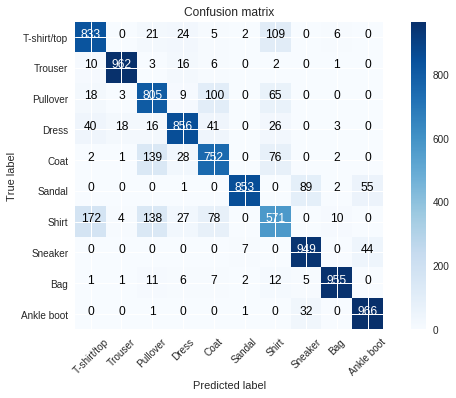

In [0]:
##Downsampled
print(yPredictedTestDown.shape)
print(testLabels.shape)
cm = confusion_matrix(testLabels, yPredictedTestDown)
plot_confusion_matrix(cm)

accuracyScore = sklearn.metrics.accuracy_score(testLabels, yPredictedTestDown)
print(accuracyScore)

### Not downsampled

(10000,)
(10000,)
0.8541


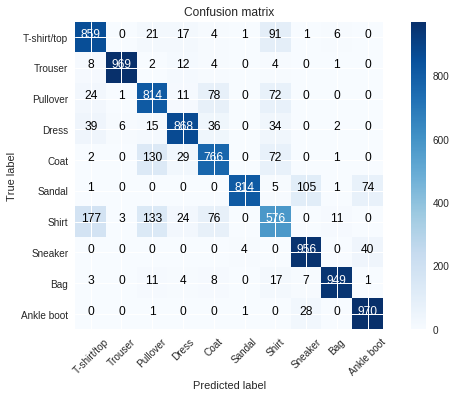

In [0]:
##Not Downsampled
print(yPredictedTestDown.shape)
print(testLabels.shape)
cm = confusion_matrix(testLabels, yPredictedTest)
plot_confusion_matrix(cm)

accuracyScore = sklearn.metrics.accuracy_score(testLabels, yPredictedTest)
print(accuracyScore)